In [ ]:
!pip install seaborn scikit-learn matplotlib torch datasets transformers pandas

from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from google.colab import drive

In [ ]:
# 데이터셋 로드 및 구조 분석
def explore_dataset(dataset_name, text_column='conversations'):

  # 데이터 로드
  if dataset_name != "ShareGPT" :
    data = load_dataset(dataset_name)
  else :
    drive.mount('/content/gdrive')
    data = load_dataset("json", data_files="/content/gdrive/My Drive/shareGPT/ShareGPT_V3_unfiltered_cleaned_split.json")
  if dataset_name == "tatsu-lab/alpaca" :
    text_column = 'instruction'
  # 데이터 구조와 분할 출력
  print("Features:", data['train'].features)
  print("Available splits:", data.keys())

  # 데이터셋 구조와 타입, 상위 데이터 출력
  df = pd.DataFrame(data['train'])
  print("데이터셋 구조:", df.shape)
  print("처음 5개 데이터:\n")
  print(df.head())
  print("\n데이터 타입:\n", df.dtypes)
  print("\n결측치 수:\n")
  print(df.isnull().sum())
  df['text_str'] = df[f'{text_column}'].apply(lambda x: str(x))
  print("\n중복 데이터 수:", df['text_str'].duplicated().sum())

  return df

# text 길이 분포 출력
def visualize_clustering(df, bins=1000, xlim=100):
  df['text_length'] = df['text_str'].apply(len)
  plt.figure(figsize=(10, 6))
  plt.hist(df['text_length'], bins=bins, color='blue', alpha=0.7)
  plt.title('Text Length Distribution')
  plt.xlabel('Length of Text')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  if xlim:
      plt.xlim(0, xlim)
  plt.show()
  df.describe()

  # kmeans_clustering
  vectorizer = TfidfVectorizer(stop_words='english')
  X = vectorizer.fit_transform(df['text_str'])
  kmeans = KMeans(n_clusters=5)
  kmeans.fit(X)
  df['cluster'] = kmeans.labels_
  print(df['cluster'].value_counts())

  order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
  terms = vectorizer.get_feature_names_out()
  for i in range(5):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
      print(f' {terms[ind]}')
    print()

  # 각 군집에서 대표 샘플 선택 및 차원 축소
  sample_indices = []
  for i in range(5):
    cluster_indices = df[df['cluster'] == i].index
    sample_indices.extend(np.random.choice(cluster_indices, 50, replace=False))
  X_sample = X[sample_indices]
  pca = PCA(n_components=2)
  X_sample_pca = pca.fit_transform(X_sample.toarray())

  # 시각화
  plt.figure(figsize=(10, 10))
  colors = ['r', 'g', 'b', 'y', 'c']
  for i in range(5):
    plt.scatter(X_sample_pca[df.loc[sample_indices, 'cluster'] == i, 0],
                X_sample_pca[df.loc[sample_indices, 'cluster'] == i, 1],
                color=colors[i], label=f'Cluster {i}')
  plt.legend()
  plt.show()




/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Features: {'idx': Value(dtype='string', id=None), 'conversations': [{'from': Value(dtype='string', id=None), 'value': Value(dtype='string', id=None)}]}
Available splits: dict_keys(['train'])
데이터셋 구조: (143000, 2)
처음 5개 데이터:

            idx                                      conversations
0       heR0vZB  [{'from': 'human', 'value': 'As an online plat...
1       HjB4l6C  [{'from': 'human', 'value': 'Create an Excel m...
2       zQCptr6  [{'from': 'human', 'value': 'Please develop a ...
3       iUb7Ey9  [{'from': 'human', 'value': 'Can you create a ...
4  alpaca_21997  [{'from': 'human', 'value': 'How can we develo...

데이터 타입:
 idx              object
conversations    object
dtype: object

결측치 수:

idx              0
conversations    0
dtype: int64

중복 데이터 수: 68


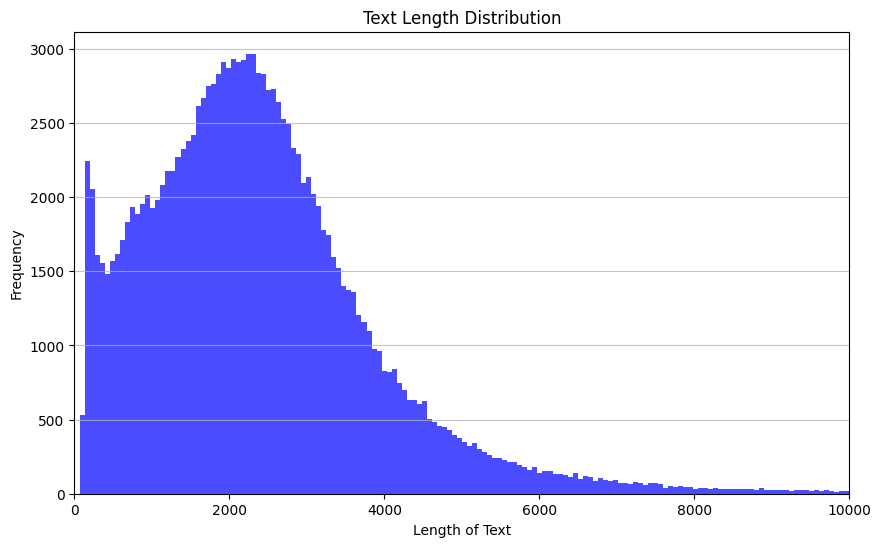

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    68227
3    32199
2    24419
4    11453
1     6702
Name: cluster, dtype: int64
Cluster 0:
 value
 human
 gpt
 time
 provide
 use
 impact
 energy
 used
 world

Cluster 1:
 sentence
 word
 words
 value
 verb
 human
 gpt
 text
 code
 given

Cluster 2:
 user
 customer
 ai
 company
 users
 ensure
 help
 technology
 social
 team

Cluster 3:
 code
 function
 number
 string
 numbers
 table
 value
 data
 file
 using

Cluster 4:
 data
 model
 learning
 machine
 algorithms
 use
 analysis
 used
 algorithm
 techniques



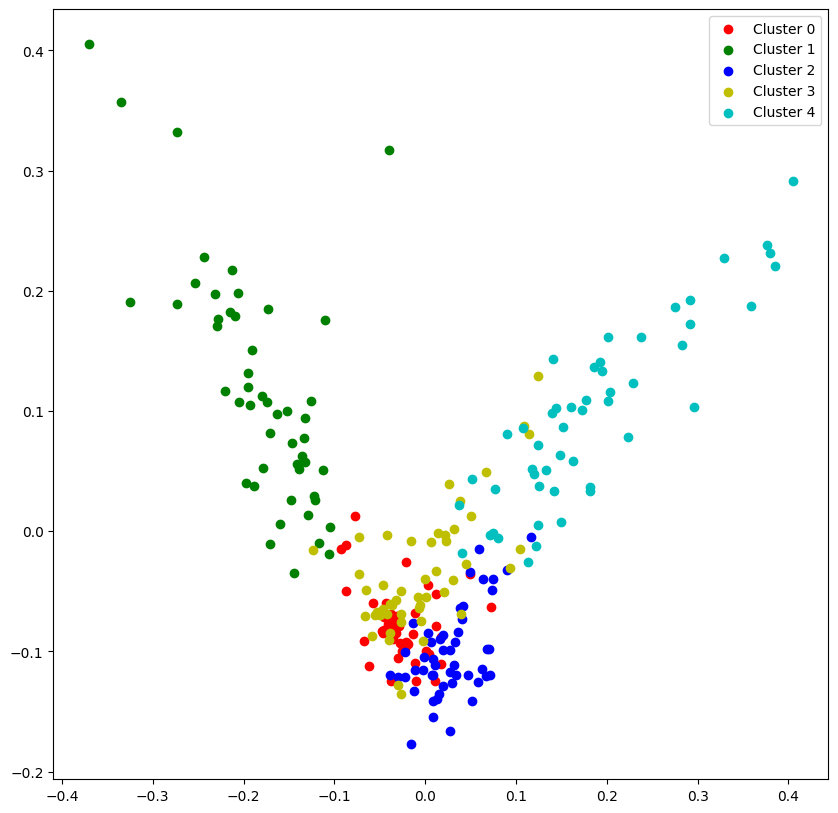

In [ ]:
# WizardLM dataset

df1 = explore_dataset("WizardLM/WizardLM_evol_instruct_V2_196k")
visualize_clustering(df1, bins=2000, xlim=10000)


Features: {'instruction': Value(dtype='string', id=None), 'input': Value(dtype='string', id=None), 'output': Value(dtype='string', id=None), 'text': Value(dtype='string', id=None)}
Available splits: dict_keys(['train'])
데이터셋 구조: (52002, 4)
처음 5개 데이터:

                                         instruction input  \
0               Give three tips for staying healthy.         
1                 What are the three primary colors?         
2                 Describe the structure of an atom.         
3                   How can we reduce air pollution?         
4  Describe a time when you had to make a difficu...         

                                              output  \
0  1.Eat a balanced diet and make sure to include...   
1  The three primary colors are red, blue, and ye...   
2  An atom is made up of a nucleus, which contain...   
3  There are a number of ways to reduce air pollu...   
4  I had to make a difficult decision when I was ...   

                                      

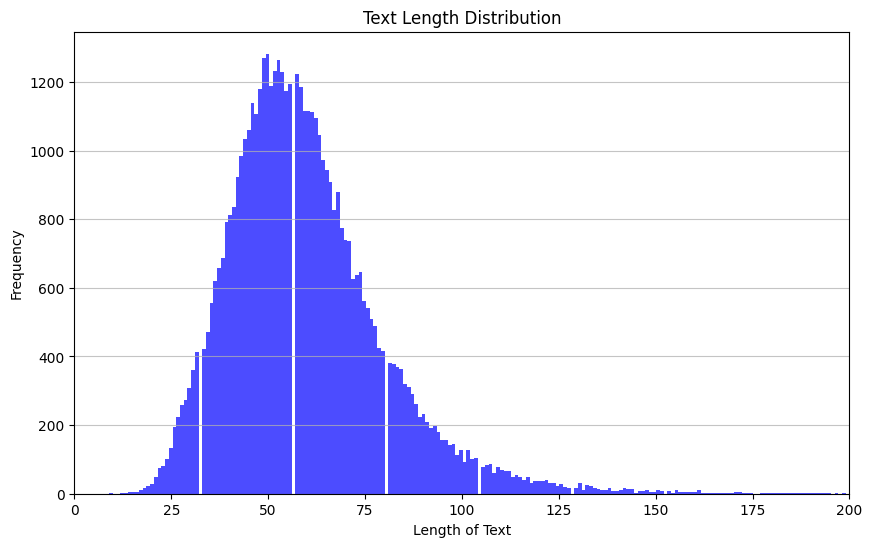

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    34347
0     5876
2     4981
3     4158
4     2640
Name: cluster, dtype: int64
Cluster 0:
 sentence
 following
 rewrite
 given
 words
 using
 edit
 make
 word
 correct

Cluster 1:
 given
 following
 write
 list
 identify
 text
 suggest
 provide
 words
 summarize

Cluster 2:
 generate
 list
 given
 story
 sentence
 following
 words
 new
 questions
 creative

Cluster 3:
 create
 list
 given
 new
 story
 following
 using
 words
 poem
 sentence

Cluster 4:
 explain
 concept
 important
 given
 difference
 learning
 works
 following
 meaning
 sentences



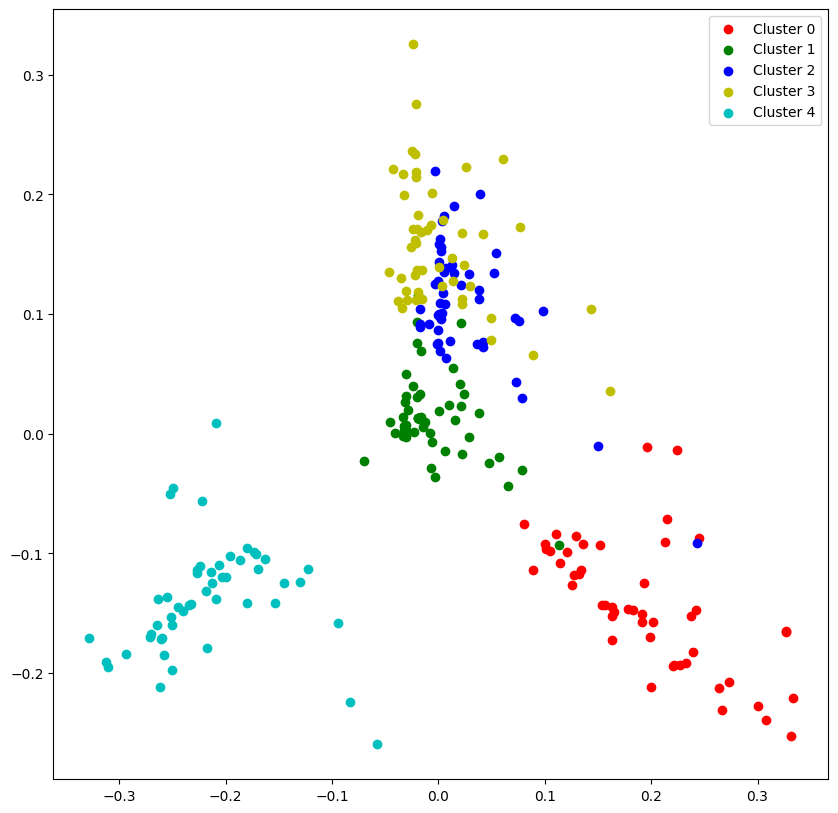

In [ ]:
# Alpaca dataset

df2 = explore_dataset("tatsu-lab/alpaca")
visualize_clustering(df2, bins=500, xlim=200)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Features: {'id': Value(dtype='string', id=None), 'conversations': [{'from': Value(dtype='string', id=None), 'markdown': {'answer': Value(dtype='string', id=None), 'index': Value(dtype='int64', id=None), 'type': Value(dtype='string', id=None)}, 'text': Value(dtype='string', id=None), 'value': Value(dtype='string', id=None)}]}
Available splits: dict_keys(['train'])
데이터셋 구조: (94145, 2)
처음 5개 데이터:

           id                                      conversations
0   QWJhYvA_0  [{'from': 'human', 'markdown': None, 'text': N...
1   i6IyJda_0  [{'from': 'human', 'markdown': None, 'text': N...
2   A5AbcES_0  [{'from': 'human', 'markdown': None, 'text': N...
3   hRPPgZT_0  [{'from': 'human', 'markdown': None, 'text': N...
4  hRPPgZT_11  [{'from': 'gpt', 'markdown': None, 'text': Non...

데이터 타입:
 id               object
conversations    object
dtype: object

결측치 수:



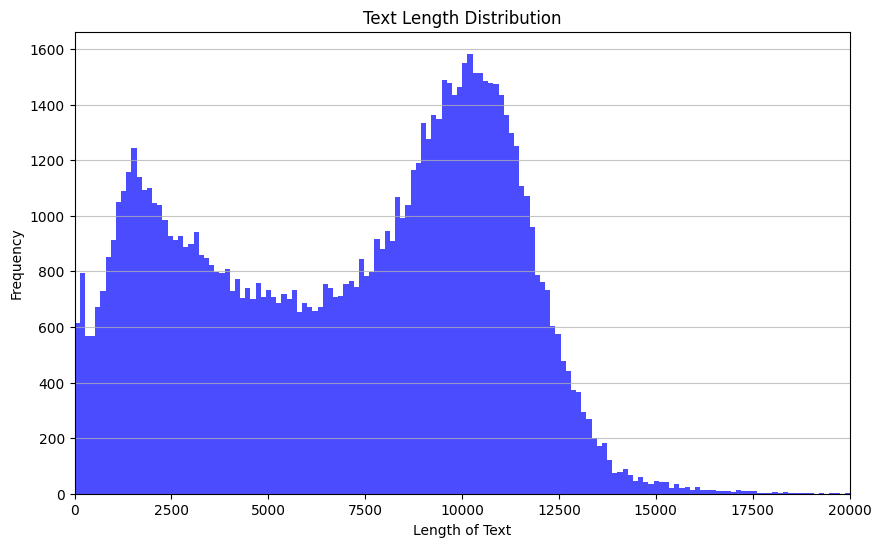

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    49534
3    24451
2    14189
4     5456
1      515
Name: cluster, dtype: int64
Cluster 0:
 value
 text
 markdown
 gpt
 human
 time
 like
 help
 world
 use

Cluster 1:
 hello
 today
 text
 markdown
 value
 assist
 hi
 help
 gpt
 human

Cluster 2:
 business
 value
 text
 data
 markdown
 marketing
 company
 customer
 management
 team

Cluster 3:
 file
 value
 text
 code
 function
 data
 string
 user
 markdown
 id

Cluster 4:
 data
 model
 self
 python
 text
 import
 learning
 train
 nfrom
 def



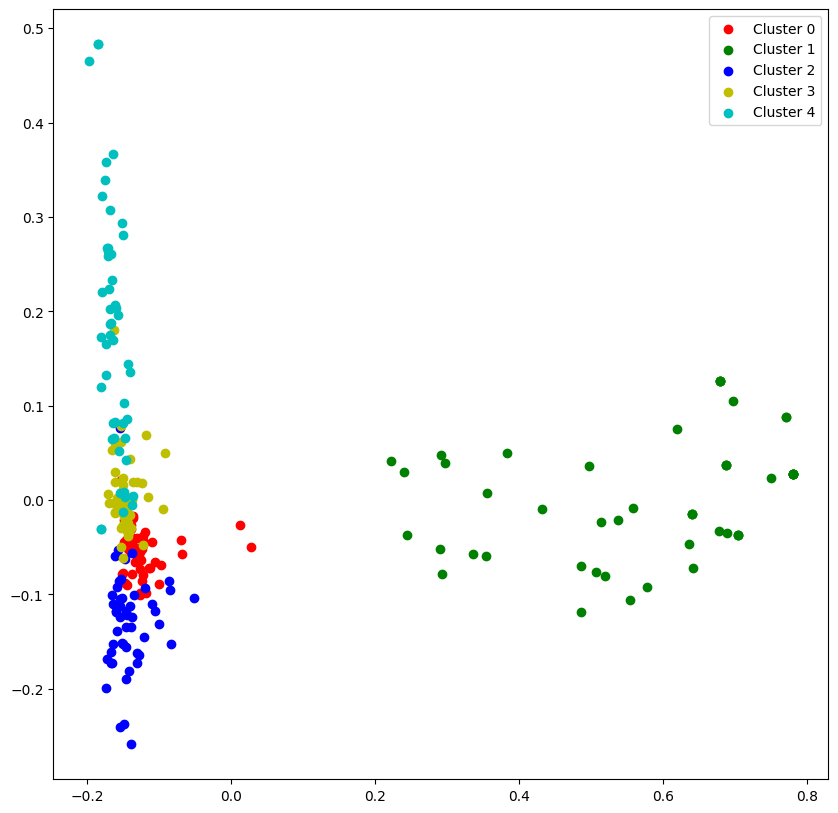

In [ ]:
# ShareGPT dataset

df3 = explore_dataset("ShareGPT")
visualize_clustering(df3, bins=3000, xlim=20000)